# Recipe 5-1. Implementing Multiclass Classification

In [11]:
%pip install pandas
%pip install nltk
%pip install scikit-learn
%pip install textblob
%pip install seaborn
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [12]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lattae\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lattae\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lattae\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import os
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import sklearn.feature_extraction.text as text
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from io import StringIO
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [14]:
# Read the CSV file into a DataFrame
Data = pd.read_csv('D:\\College\\Semester 6\\NLP (Natural Language Processing)\\TugasBab5_Galih Lanjar Pangastuti_2107412037_CCIT 6B\\consumer_complaints.csv', encoding='latin-1')

C:\Users\Lattae\AppData\Local\Temp\ipykernel_920\2736266572.py:2: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  Data = pd.read_csv('D:\\College\\Semester 6\\NLP (Natural Language Processing)\\TugasBab5_Galih Lanjar Pangastuti_2107412037_CCIT 6B\\consumer_complaints.csv', encoding='latin-1')


In [16]:
# 1-3 Importing the data

Data.dtypes

date_received                   object
product                         object
sub_product                     object
issue                           object
sub_issue                       object
consumer_complaint_narrative    object
company_public_response         object
company                         object
state                           object
zipcode                         object
tags                            object
consumer_consent_provided       object
submitted_via                   object
date_sent_to_company            object
company_response_to_consumer    object
timely_response                 object
consumer_disputed?              object
complaint_id                     int64
dtype: object

In [17]:
Data.shape

(555957, 18)

In [18]:
# Selecting required columns and rows
Data = Data[['product', 'consumer_complaint_narrative']]
Data = Data[pd.notnull(Data['consumer_complaint_narrative'])]

# See top 5 rows
Data.head()

,product,consumer_complaint_narrative
190126,Debt collection,XXXX has claimed I owe them {$27.00} for XXXX ...
190135,Consumer Loan,Due to inconsistencies in the amount owed that...
190155,Mortgage,In XX/XX/XXXX my wages that I earned at my job...
190207,Mortgage,I have an open and current mortgage with Chase...
190208,Mortgage,XXXX was submitted XX/XX/XXXX. At the time I s...


In [19]:
# Factorizing the category column
Data['category_id'] = Data['product'].factorize()[0]
Data.head()

,product,consumer_complaint_narrative,category_id
190126,Debt collection,XXXX has claimed I owe them {$27.00} for XXXX ...,0
190135,Consumer Loan,Due to inconsistencies in the amount owed that...,1
190155,Mortgage,In XX/XX/XXXX my wages that I earned at my job...,2
190207,Mortgage,I have an open and current mortgage with Chase...,2
190208,Mortgage,XXXX was submitted XX/XX/XXXX. At the time I s...,2


In [20]:
# Check the distribution of complaints by category
Data.groupby('product').consumer_complaint_narrative.count()

product
Bank account or service     5711
Consumer Loan               3678
Credit card                 7929
Credit reporting           12526
Debt collection            17552
Money transfers              666
Mortgage                   14919
Other financial service      110
Payday loan                  726
Prepaid card                 861
Student loan                2128
Name: consumer_complaint_narrative, dtype: int64

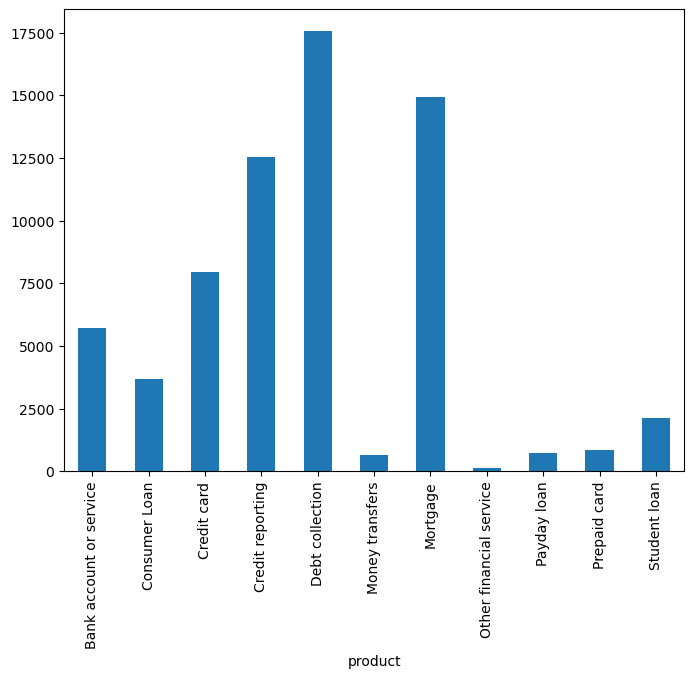

In [21]:
# Lets plot it and see
fig = plt.figure(figsize=(8,6))
Data.groupby('product').consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

In [22]:
# splitting the data
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(Data['consumer_complaint_narrative'], Data['product'])

In [23]:
# Feature Engineering USing TF-IDF
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(Data['consumer_complaint_narrative'])
xtrain_tfidf = tfidf_vect.transform(train_x)
xvalid_tfidf = tfidf_vect.transform(valid_x)

In [24]:
# Model Building and Evaluation
model = linear_model.LogisticRegression().fit(xtrain_tfidf, train_y)

# Model summary
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, max_iter=100, multi_class='ovr',
                   n_jobs=1, penalty='l2', random_state=None, solver='liblinear',
                   tol=0.0001, verbose=0, warm_start=False)

c:\Users\Lattae\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

In [25]:
# Checking accuracy
accuracy = metrics.accuracy_score(model.predict(xvalid_tfidf), valid_y)
print ("Accuracy: ", accuracy, '\n')

# Classification report
print(metrics.classification_report(valid_y, model.predict(xvalid_tfidf), target_names=Data['product'].unique()))

Accuracy:  0.8483415159861094 

                         precision    recall  f1-score   support

        Debt collection       0.80      0.78      0.79      1396
          Consumer Loan       0.81      0.60      0.69       932
               Mortgage       0.81      0.83      0.82      1959
            Credit card       0.86      0.86      0.86      3135
       Credit reporting       0.82      0.89      0.85      4399
           Student loan       0.67      0.55      0.60       143
Bank account or service       0.92      0.95      0.94      3766
            Payday loan       0.00      0.00      0.00        28
        Money transfers       0.63      0.28      0.38       177
Other financial service       0.82      0.62      0.71       221
           Prepaid card       0.89      0.78      0.83       546

               accuracy                           0.85     16702
              macro avg       0.73      0.65      0.68     16702
           weighted avg       0.84      0.85      0.84  

c:\Users\Lattae\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lattae\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lattae\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


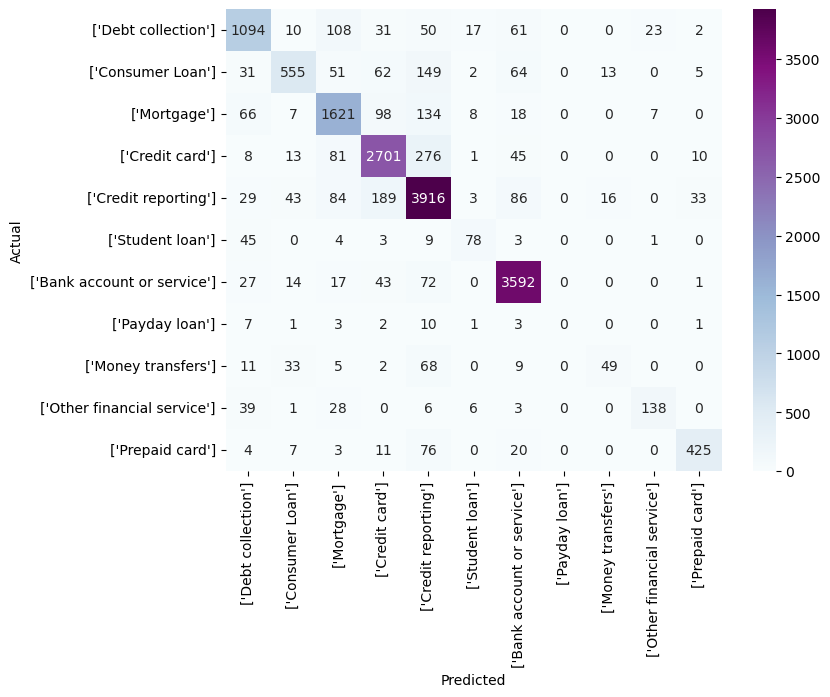

In [26]:
#confusion matrix
conf_mat = confusion_matrix(valid_y, model.predict(xvalid_tfidf))

# Vizualizing confusion matrix
category_id_df = Data[['product', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'product']].values)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="BuPu", xticklabels=category_id_df[['product']].values,
            yticklabels=category_id_df[['product']].values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [27]:
# Prediction Example
texts = ["This company refuses to provide me verification and validation of debt" +
         "per my right under the FDCPA. I do not believe this debt is mine."]
text_features = tfidf_vect.transform(texts)
predictions = model.predict(text_features)
print(texts)
print(" - Predicted as: '{}'".format(id_to_category[predictions[0]]))

['This company refuses to provide me verification and validation of debtper my right under the FDCPA. I do not believe this debt is mine.']
 - Predicted as: 'Credit reporting'


# Recipe 5-2. Implementing Sentiment Analysis

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
#Read the data
df = pd.read_csv('D:\\College\\Semester 6\\NLP (Natural Language Processing)\\TugasBab5_Galih Lanjar Pangastuti_2107412037_CCIT 6B\\Reviews.csv')

df = df[:1000]

# Look at the top 5 rows of the data
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [28]:
# Understand the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      1000 non-null   int64 
 1   ProductId               1000 non-null   object
 2   UserId                  1000 non-null   object
 3   ProfileName             1000 non-null   object
 4   HelpfulnessNumerator    1000 non-null   int64 
 5   HelpfulnessDenominator  1000 non-null   int64 
 6   Score                   1000 non-null   int64 
 7   Time                    1000 non-null   int64 
 8   Summary                 1000 non-null   object
 9   Text                    1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [29]:
# Looking at the summary of the reviews.
df.Summary.head(5)

0    Good Quality Dog Food
1        Not as Advertised
2    "Delight" says it all
3           Cough Medicine
4              Great taffy
Name: Summary, dtype: object

In [30]:
# Looking at the description of the reviews
df.Text.head(5)

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

Text preprocessing

In [31]:
# Import libraries
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lattae\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
# Lower casing and removing punctuations
df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Text'] = df['Text'].str.replace('[^\w\s]','')
df.Text.head(5)

0    i have bought several of the vitality canned d...
1    product arrived labeled as jumbo salted peanut...
2    this is a confection that has been around a fe...
3    if you are looking for the secret ingredient i...
4    great taffy at a great price. there was a wide...
Name: Text, dtype: object

In [33]:
# Removal of stop words
stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.Text.head(5)

0    bought several vitality canned dog food produc...
1    product arrived labeled jumbo salted peanuts.....
2    confection around centuries. light, pillowy ci...
3    looking secret ingredient robitussin believe f...
4    great taffy great price. wide assortment yummy...
Name: Text, dtype: object

In [34]:
# Spelling correction
df['Text'] = df['Text'].apply(lambda x: str(TextBlob(x).correct()))
df.Text.head(5)

0    bought several vitality canned dog food produc...
1    product arrived labelled lumbo halted peanuts....
2    connection around centuries. light, pillow cit...
3    looking secret ingredient robitussin believe f...
4    great staff great price. wide assortment mummy...
Name: Text, dtype: object

In [35]:
# Lemmatization
df['Text'] = df['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.Text.head(5)

0    bought several vitality canned dog food produc...
1    product arrived labelled lumbo halted peanuts....
2    connection around centuries. light, pillow cit...
3    looking secret ingredient robitussin believe f...
4    great staff great price. wide assortment mummy...
Name: Text, dtype: object

Exploratory data analysis

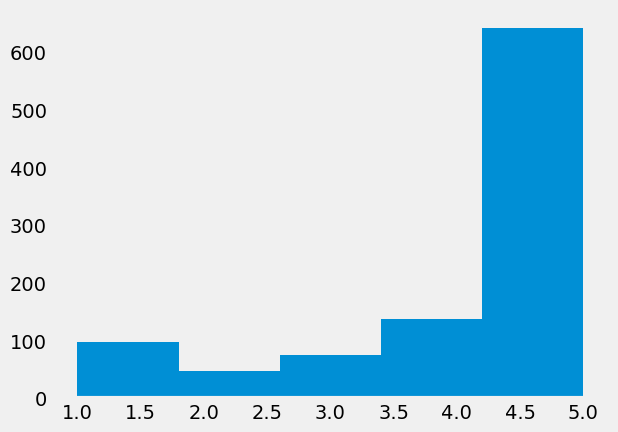

Score
1     98
2     47
3     75
4    138
5    642
Name: Id, dtype: int64


In [36]:
# Create a new data frame "reviews" to perform exploratory data analysis upon that
reviews = df

# Dropping null values
reviews.dropna(inplace=True)

# The histogram reveals this dataset is highly unbalanced towards high rating.
reviews.Score.hist(bins=5,grid=False)
plt.show()
print(reviews.groupby('Score').count().Id)

In [37]:
# To make it balanced data, we sampled each score by the lowest n-count from above. (i.e. 29743 reviews scored as '2')
score_counts = reviews['Score'].value_counts()
min_count = min(score_counts)

score_1 = reviews[reviews['Score'] == 1].sample(n=min_count)
score_2 = reviews[reviews['Score'] == 2].sample(n=min_count)
score_3 = reviews[reviews['Score'] == 3].sample(n=min_count)
score_4 = reviews[reviews['Score'] == 4].sample(n=min_count)
score_5 = reviews[reviews['Score'] == 5].sample(n=min_count)

# Here we recreate a 'balanced' dataset.
reviews_sample = pd.concat([score_1,score_2,score_3,score_4,
score_5],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)

In [14]:
# Printing count by 'Score' to check dataset is now balanced.
print(reviews_sample.groupby('Score').count().Id)

Score
1    4
2    4
3    4
4    4
5    4
Name: Id, dtype: int64


In [59]:
%pip install wordcloud

   ---------------------------------------- 0.0/300.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.6 kB ? eta -:--:--
   ----- --------------------------------- 41.0/300.6 kB 495.5 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/300.6 kB 544.7 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/300.6 kB 544.7 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/300.6 kB 544.7 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/300.6 kB 544.7 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/300.6 kB 262.6 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/300.6 kB 312.2 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/300.6 kB 288.1 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/300.6 kB 304.6 kB/s eta 0:00:01
   -------------------- ----------------- 163.8/300.6 kB 317.4 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/300.6 kB 

In [38]:
# Let's build a word cloud looking at the 'Summary' text
from wordcloud import WordCloud
from wordcloud import STOPWORDS

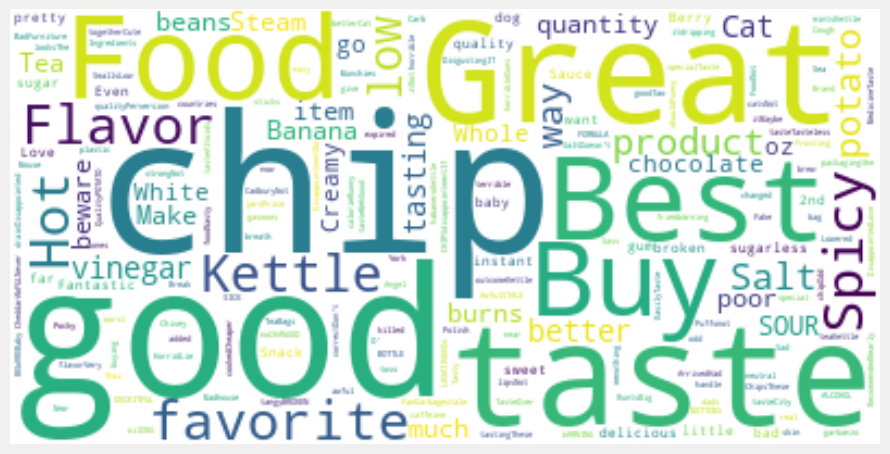

In [39]:
# Wordcloud function's input needs to be a single string of text.
# Here I'm concatenating all Summaries into a single string.
# similarly you can build for Text column
reviews_str = reviews_sample.Summary.str.cat()
wordcloud = WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

Text(0.5, 1.0, 'Reviews with Negative Scores')

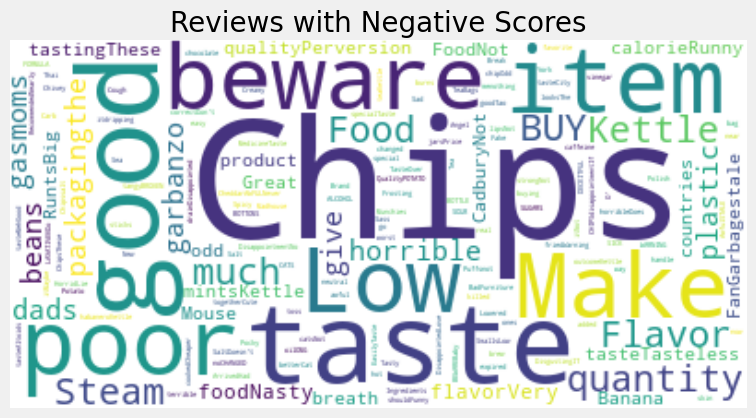

In [41]:
# Now let's split the data into Negative (Score is 1 or 2) and Positive (4 or #5) Reviews.
negative_reviews = reviews_sample[reviews_sample['Score'].isin([1,2]) ]
positive_reviews = reviews_sample[reviews_sample['Score'].isin([4,5]) ]

# Transform to single string
negative_reviews_str = negative_reviews.Summary.str.cat()
positive_reviews_str = positive_reviews.Summary.str.cat()

# Create wordclouds
wordcloud_negative = WordCloud(background_color='white').generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='white').generate(positive_reviews_str)

# Plot
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Scores',fontsize=20)

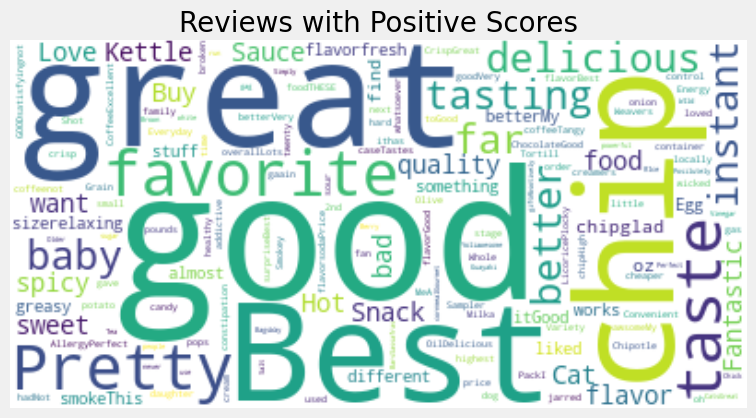

In [42]:
fig2 = plt.figure(figsize=(10,10))
ax2 = fig2.add_subplot(212)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Positive Scores',fontsize=20)
plt.show()

Sentiment scores

In [43]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import os
import sys
import ast

In [44]:
plt.style.use('fivethirtyeight')

# Function for getting the sentiment
cp = sns.color_palette()

In [73]:
%pip install vaderSentiment

   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   ------------- -------------------------- 41.0/126.0 kB ? eta -:--:--
   ------------------- -------------------- 61.4/126.0 kB 1.7 MB/s eta 0:00:01
   ---------------------------- ---------- 92.2/126.0 kB 871.5 kB/s eta 0:00:01
   ---------------------------- ---------- 92.2/126.0 kB 871.5 kB/s eta 0:00:01
   ---------------------------- ---------- 92.2/126.0 kB 871.5 kB/s eta 0:00:01
   ---------------------------- ---------- 92.2/126.0 kB 871.5 kB/s eta 0:00:01
   ---------------------------- ---------- 92.2/126.0 kB 871.5 kB/s eta 0:00:01
   ---------------------------- ---------- 92.2/126.0 kB 871.5 kB/s eta 0:00:01
   ---------------------------- ---------- 92.2/126.0 kB 871.5 kB/s eta 0:00:01
   --

In [45]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [46]:
# Generating sentiment for all the sentence present in the dataset
emptyline=[]
for row in df['Text']:
    vs=analyzer.polarity_scores(row)
    emptyline.append(vs)
    
# Creating new dataframe with sentiments
df_sentiments=pd.DataFrame(emptyline)
df_sentiments.head(5)

,neg,neu,pos,compound
0,0.000,0.517,0.483,0.9413
1,0.258,0.644,0.099,-0.5719
2,0.126,0.623,0.250,0.7880
3,0.000,0.868,0.132,0.4404
4,0.000,0.455,0.545,0.9186


In [47]:
# Merging the sentiments back to reviews dataframe
df_c = pd.concat([df.reset_index(drop=True), df_sentiments], axis=1)
df_c.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,0.000,0.517,0.483,0.9413
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labelled lumbo halted peanuts....,0.258,0.644,0.099,-0.5719
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","connection around centuries. light, pillow cit...",0.126,0.623,0.250,0.7880


In [48]:
# Convert scores into positive and negetive sentiments using some threshold
df_c['Sentiment'] = np.where(df_c['compound'] >= 0 , 'Positive', 'Negative')
df_c.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,0.000,0.517,0.483,0.9413,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labelled lumbo halted peanuts....,0.258,0.644,0.099,-0.5719,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","connection around centuries. light, pillow cit...",0.126,0.623,0.250,0.7880,Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,looking secret ingredient robitussin believe f...,0.000,0.868,0.132,0.4404,Positive
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great staff great price. wide assortment mummy...,0.000,0.455,0.545,0.9186,Positive


Business insights

<Axes: xlabel='Sentiment'>

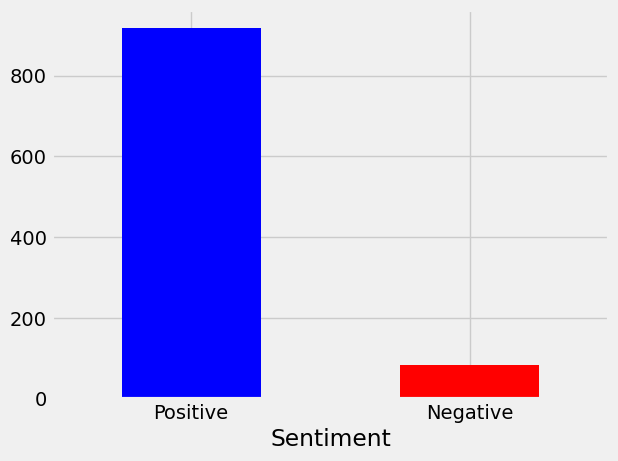

In [49]:
# see how the overall sentiment is using the sentiment we generated.
result=df_c['Sentiment'].value_counts()
result.plot(kind='bar', rot=0, color=['blue', 'red'])

<Axes: xlabel='ProductId'>

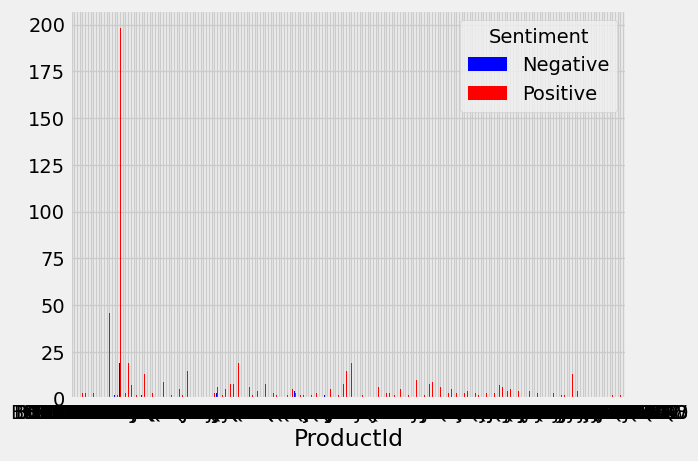

In [51]:
#Sample code snippet
result=df_c.groupby('ProductId')['Sentiment'].value_counts().unstack()
result[['Negative','Positive']].plot(kind='bar', rot=0, color=['blue', 'red'])

# Recipe 5-3. Applying Text Similarity Functions

Step 3A-1 Read and understand the data

In [1]:
# Import package
%pip install recordlinkage --upgrade

Note: you may need to restart the kernel to use updated packages.


In [7]:
#For this demo let us use the inbuilt dataset from recordlinkage library
#import data set
import recordlinkage
from recordlinkage.datasets import load_febrl1

In [8]:
#create a dataframe - dfa
dfA = load_febrl1()
dfA.head()

,given_name,surname,street_number,address_1,address_2,suburb,postcode,state,date_of_birth,soc_sec_id
rec_id,,,,,,,,,,
rec-223-org,NaN,waller,6,tullaroop street,willaroo,st james,4011,wa,19081209,6988048
rec-122-org,lachlan,berry,69,giblin street,killarney,bittern,4814,qld,19990219,7364009
rec-373-org,deakin,sondergeld,48,goldfinch circuit,kooltuo,canterbury,2776,vic,19600210,2635962
rec-10-dup-0,kayla,harrington,NaN,maltby circuit,coaling,coolaroo,3465,nsw,19150612,9004242
rec-227-org,luke,purdon,23,ramsay place,mirani,garbutt,2260,vic,19831024,8099933


Step 3A-2 Blocking

In [20]:
# Indexing using SortedNeighbourhood
indexer = recordlinkage.Index()
indexer.block(on='given_name')
pairs = indexer.index(dfA)

print(len(pairs))

2082


Step 3A-3 Similarity matching and scoring

In [21]:
# This cell can take some time to compute.
compare_cl = recordlinkage.Compare()
compare_cl.string('given_name', 'given_name',method='jarowinkler', label='given_name')
compare_cl.string('surname', 'surname', method='jarowinkler', label='surname')
compare_cl.exact('date_of_birth', 'date_of_birth', label='date_of_birth')
compare_cl.exact('suburb', 'suburb', label='suburb')
compare_cl.exact('state', 'state', label='state')
compare_cl.string('address_1', 'address_1',method='jarowinkler', label='address_1')

features = compare_cl.compute(pairs, dfA)
features.sample(5)

,,given_name,surname,date_of_birth,suburb,state,address_1
rec_id_1,rec_id_2,,,,,,
rec-334-org,rec-115-dup-0,1.0,0.000000,0,0,0,0.571517
rec-51-org,rec-376-org,1.0,0.577778,0,0,0,0.513919
rec-84-org,rec-331-dup-0,1.0,0.464286,0,0,0,0.596759
rec-90-dup-0,rec-382-org,1.0,0.710317,0,0,1,0.435897
rec-204-dup-0,rec-165-dup-0,1.0,0.430303,0,0,0,0.588889


Step 3A-4 Predicting records match or do not match using ECM – classifier

In [23]:
# select all the features except for given_name since its our blocking key
features1 = features[['suburb','state','surname','date_of_birth','address_1']]

# Unsupervised learning – probabilistic
ecm = recordlinkage.ECMClassifier()
result_ecm = ecm.learn((features1).astype(int),return_type = 'series')
result_ecm

C:\Users\Lattae\AppData\Local\Temp\ipykernel_19112\820564344.py:6: UserWarning: learn is deprecated, ECMClassifier.fit_predict instead
  result_ecm = ecm.learn((features1).astype(int),return_type = 'series')


rec_id_1       rec_id_2     
rec-251-org    rec-251-dup-0    1
rec-284-dup-0  rec-67-org       0
rec-335-dup-0  rec-335-org      1
rec-23-dup-0   rec-23-org       1
rec-32-dup-0   rec-70-org       0
                               ..
rec-469-dup-0  rec-183-org      0
               rec-360-dup-0    0
               rec-248-dup-0    0
rec-350-dup-0  rec-350-org      1
               rec-242-org      0
Name: classification, Length: 2082, dtype: int32

Records of same customers from multiple tables

Step 3B-1 Read and understand the data

In [24]:
from recordlinkage.datasets import load_febrl4
dfA, dfB = load_febrl4()
dfA.head()

,given_name,surname,street_number,address_1,address_2,suburb,postcode,state,date_of_birth,soc_sec_id
rec_id,,,,,,,,,,
rec-1070-org,michaela,neumann,8,stanley street,miami,winston hills,4223,nsw,19151111,5304218
rec-1016-org,courtney,painter,12,pinkerton circuit,bega flats,richlands,4560,vic,19161214,4066625
rec-4405-org,charles,green,38,salkauskas crescent,kela,dapto,4566,nsw,19480930,4365168
rec-1288-org,vanessa,parr,905,macquoid place,broadbridge manor,south grafton,2135,sa,19951119,9239102
rec-3585-org,mikayla,malloney,37,randwick road,avalind,hoppers crossing,4552,vic,19860208,7207688


In [25]:
dfB.head()

,given_name,surname,street_number,address_1,address_2,suburb,postcode,state,date_of_birth,soc_sec_id
rec_id,,,,,,,,,,
rec-561-dup-0,elton,NaN,3,light setreet,pinehill,windermere,3212,vic,19651013,1551941
rec-2642-dup-0,mitchell,maxon,47,edkins street,lochaoair,north ryde,3355,nsw,19390212,8859999
rec-608-dup-0,NaN,white,72,lambrigg street,kelgoola,broadbeach waters,3159,vic,19620216,9731855
rec-3239-dup-0,elk i,menzies,1,lyster place,NaN,northwood,2585,vic,19980624,4970481
rec-2886-dup-0,NaN,garanggar,NaN,may maxwell crescent,springettst arcade,forest hill,2342,vic,19921016,1366884


Step 3B-2 Blocking – to reduce the comparison window and creating record pairs

In [28]:
# Indexing using SortedNeighbourhood
indexer = recordlinkage.Index()
indexer.block(on='given_name')
pairs = indexer.index(dfA, dfB)

77249


Step 3B-3 Similarity matching

In [30]:
compare_cl = recordlinkage.Compare()
compare_cl.string('given_name', 'given_name',method='jarowinkler', label='given_name')
compare_cl.string('surname', 'surname', method='jarowinkler', label='surname')
compare_cl.exact('date_of_birth', 'date_of_birth', label='date_of_birth')
compare_cl.exact('suburb', 'suburb', label='suburb')
compare_cl.exact('state', 'state', label='state')
compare_cl.string('address_1', 'address_1',method='jarowinkler', label='address_1')

features = compare_cl.compute(pairs, dfA, dfB)
features.head(10)

given_name   surname  date_of_birth  suburb  \
rec_id_1     rec_id_2                                                      
rec-1070-org rec-3024-dup-0         1.0  0.436508              0       0   
             rec-2371-dup-0         1.0  0.490079              0       0   
             rec-4652-dup-0         1.0  0.490079              0       0   
             rec-4795-dup-0         1.0  0.000000              0       0   
             rec-1314-dup-0         1.0  0.000000              0       0   
rec-1016-org rec-1209-dup-0         1.0  0.000000              0       0   
             rec-1151-dup-0         1.0  0.742857              0       0   
             rec-4141-dup-0         1.0  0.345238              0       0   
             rec-4215-dup-0         1.0  0.539683              0       0   
             rec-2463-dup-0         1.0  0.539683              0       0   

                             state  address_1  
rec_id_1     rec_id_2                          
rec-1070-org rec-3024-dup-0      1   0.000000  
             rec-2371-dup-0      0   0.715873  
             rec-4652-dup-0      0   0.645604  
             rec-4795-dup-0      1   0.552381  
             rec-1314-dup-0      1   0.618254  
rec-1016-org rec-1209-dup-0      1   0.464706  
             rec-1151-dup-0      0   0.464869  
             rec-4141-dup-0      0   0.578525  
             rec-4215-dup-0      0   0.671517  
             rec-2463-dup-0      0   0.570324

Step 3B-4 Predicting records match or do not match using ECM – classifier

In [31]:
# select all the features except for given_name since its our blocking key
features1 = features[['suburb','state','surname','date_of_birth', 'address_1']]

# unsupervised learning - probablistic
ecm = recordlinkage.ECMClassifier()
result_ecm = ecm.learn((features1).astype(int),return_type = 'series')
result_ecm

C:\Users\Lattae\AppData\Local\Temp\ipykernel_19112\1434405357.py:6: UserWarning: learn is deprecated, ECMClassifier.fit_predict instead
  result_ecm = ecm.learn((features1).astype(int),return_type = 'series')


rec_id_1      rec_id_2      
rec-1070-org  rec-3024-dup-0    0
              rec-2371-dup-0    0
              rec-4652-dup-0    0
              rec-4795-dup-0    0
              rec-1314-dup-0    0
                               ..
rec-1003-org  rec-3321-dup-0    0
rec-4883-org  rec-4883-dup-0    1
rec-66-org    rec-3318-dup-0    0
              rec-66-dup-0      1
              rec-3838-dup-0    0
Name: classification, Length: 77249, dtype: int32

# Recipe 5-4. Summarizing Text Data

Method 4-1 TextRank

In [1]:
# Import BeautifulSoup and urllib libraries to fetch data from Wikipedia.
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [2]:
# Function to get data from Wikipedia
def get_only_text(url):
    page = urlopen(url)
    soup = BeautifulSoup(page)
    text = ' '.join(map(lambda p: p.text, soup.find_all('p')))
    print (text)
    return soup.title.text, text

# Mention the Wikipedia url
url="https://en.wikipedia.org/wiki/Natural_language_processing"

# Call the function created above
text = get_only_text(url) 

# Count the number of letters
len(''.join(text))

Natural language processing (NLP) is an interdisciplinary subfield of computer science and information retrieval. It is primarily concerned with giving computers the ability to support and manipulate human language. It involves processing natural language datasets, such as text corpora or speech corpora, using either rule-based or probabilistic (i.e. statistical and, most recently, neural network-based) machine learning approaches. The goal is a computer capable of "understanding"[citation needed] the contents of documents, including the contextual nuances of the language within them. To this end, natural language processing often borrows ideas from theoretical linguistics. The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.
 Challenges in natural language processing frequently involve speech recognition, natural-language understanding, and natural-language generation.
 Natural langu

8061

In [3]:
# Lets see first 1000 letters from the text
print(text[:1000])

('Natural language processing - Wikipedia', 'Natural language processing (NLP) is an interdisciplinary subfield of computer science and information retrieval. It is primarily concerned with giving computers the ability to support and manipulate human language. It involves processing natural language datasets, such as text corpora or speech corpora, using either rule-based or probabilistic (i.e. statistical and, most recently, neural network-based) machine learning approaches. The goal is a computer capable of "understanding"[citation needed] the contents of documents, including the contextual nuances of the language within them. To this end, natural language processing often borrows ideas from theoretical linguistics. The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.\n Challenges in natural language processing frequently involve speech recognition, natural-language understanding, a

In [4]:
%pip install "gensim==3.4.0"
%pip install gensim_sum_ext

     ---------------------------------------- 0.0/22.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/22.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/22.2 MB 1.4 MB/s eta 0:00:17
     ---------------------------------------- 0.0/22.2 MB 1.4 MB/s eta 0:00:17
     --------------------------------------- 0.1/22.2 MB 573.4 kB/s eta 0:00:39
     --------------------------------------- 0.1/22.2 MB 573.4 kB/s eta 0:00:39
     --------------------------------------- 0.1/22.2 MB 504.4 kB/s eta 0:00:44
     --------------------------------------- 0.1/22.2 MB 450.6 kB/s eta 0:00:49
     --------------------------------------- 0.2/22.2 MB 525.1 kB/s eta 0:00:42
     --------------------------------------- 0.2/22.2 MB 513.4 kB/s eta 0:00:43
      -------------------------------------- 0.3/22.2 MB 708.9 kB/s eta 0:00:31
      -------------------------------------- 0.3/22.2 MB 679.5 kB/s eta 0:00:33
      -------------------------------------- 0.4/22.2 MB 7

In [5]:
# Import summarize from gensim
from gensim.summarization import summarize
from gensim.summarization import keywords

c:\Users\Lattae\anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [6]:
# Convert text to string format
text = str(text)

#Summarize the text with ratio 0.1 (10% of the total words.)
summarize(text, ratio=0.1)

"This was due to both the steady increase in computational power (see Moore\\'s law) and the gradual lessening of the dominance of Chomskyan theories of linguistics (e.g. transformational grammar), whose theoretical underpinnings discouraged the sort of corpus linguistics that underlies the machine-learning approach to language processing.[8]\\n In 2003, word n-gram model, at the time the best statistical algorithm, was overperformed by a multi-layer perceptron (with a single hidden layer and context length of several words trained on up to 14 million of words with a CPU cluster in language modelling) by Yoshua Bengio with co-authors.[9]\\n In 2010, Tomáš Mikolov (then a PhD student at Brno University of Technology) with co-authors applied a simple recurrent neural network with a single hidden layer to language modelling,[10] and in the following years he went on to develop Word2vec.\nThat popularity was due partly to a flurry of results showing that such techniques[11][12] can achieve

In [7]:
#keywords
print(keywords(text, ratio=0.1))

cognitive
cognition
nlp
computers
computing
computational
linguistics
process
processes
model
modelling
modeling
models
natural language processing
task
tasks
grammar
grammars
approaches
approach
word
words
based
neural
rule
rules
intelligence
intelligent
statistical
machine learning
involves
involve
experiment
experience
turing
test
layer
layers
speech
interdisciplinary


Method 4-2 Feature-based text summarization

In [26]:
# Install sumy
%pip install sumy

Note: you may need to restart the kernel to use updated packages.


In [27]:
# Import the packages
from sumy.parsers.html import HtmlParser
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words
from sumy.summarizers.luhn import LuhnSummarizer

In [28]:
# Extracting and summarizing
LANGUAGE = "english"
SENTENCES_COUNT = 10

url="https://en.wikipedia.org/wiki/Natural_language_processing"
parser = HtmlParser.from_url(url, Tokenizer(LANGUAGE))
summarizer = LsaSummarizer()
summarizer = LsaSummarizer(Stemmer(LANGUAGE))
summarizer.stop_words = get_stop_words(LANGUAGE)

for sentence in summarizer(parser.document, SENTENCES_COUNT):
    print(sentence)

[2] However, real progress was much slower, and after the ALPAC report in 1966, which found that ten-year-long research had failed to fulfill the expectations, funding for machine translation was dramatically reduced.
However, there is an enormous amount of non-annotated data available (including, among other things, the entire content of the World Wide Web), which can often make up for the inferior results if the algorithm used has a low enough time complexity to be practical.
the larger such a (probabilistic) language model is, the more accurate it becomes, in contrast to rule-based systems that can gain accuracy only by increasing the amount and complexity of the rules leading to intractability problems.
[32][33][34] As far as orthography, morphology, syntax and certain aspects of semantics are concerned, and due to the development of powerful neural language models such as GPT-2, this can now (2019) be considered a largely solved problem and is being marketed in various commercial 

# Recipe 5-5. Clustering Documents

Step 5-1 Import data and libraries

In [29]:
%pip install mpld3

   ---------------------------------------- 0.0/202.6 kB ? eta -:--:--
   --- ----------------------------------- 20.5/202.6 kB 640.0 kB/s eta 0:00:01
   ------- ------------------------------- 41.0/202.6 kB 495.5 kB/s eta 0:00:01
   ------------- ------------------------- 71.7/202.6 kB 563.7 kB/s eta 0:00:01
   ----------------------- -------------- 122.9/202.6 kB 722.1 kB/s eta 0:00:01
   ---------------------------- --------- 153.6/202.6 kB 706.2 kB/s eta 0:00:01
   -------------------------------------- 202.6/202.6 kB 723.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np
import pandas as pd
import nltk
from nltk.stem.snowball import SnowballStemmer
from bs4 import BeautifulSoup
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3
from sklearn.metrics.pairwise import cosine_similarity
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.manifold import MDS

In [9]:
#Lets use the same complaint dataset we use for classification
Data = pd.read_csv("D:\\College\\Semester 6\\NLP (Natural Language Processing)\\TugasBab5_Galih Lanjar Pangastuti_2107412037_CCIT 6B\\consumer_complaints.csv",encoding='latin-1')

# Selecting required columns and rows
Data = Data[['consumer_complaint_narrative']]
Data = Data[pd.notnull(Data['consumer_complaint_narrative'])]

# Let's sample 200 documents for clustering
Data_sample = Data.sample(200)

C:\Users\Lattae\AppData\Local\Temp\ipykernel_15884\3061120150.py:2: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  Data = pd.read_csv("D:\\College\\Semester 6\\NLP (Natural Language Processing)\\TugasBab5_Galih Lanjar Pangastuti_2107412037_CCIT 6B\\consumer_complaints.csv",encoding='latin-1')


Step 5-2 Preprocessing and TF-IDF feature engineering

In [10]:
# Remove unwanted symbol
Data_sample['consumer_complaint_narrative'] = Data_sample['consumer_complaint_narrative'].str.replace('XXXX','')

In [11]:
# Convert dataframe to list
complaints = Data_sample['consumer_complaint_narrative'].tolist()

In [12]:
# create the rank of documents – we will use it later
ranks = []
for i in range(1, len(complaints)+1):
    ranks.append(i)

In [13]:
# Stop Words
stopwords = nltk.corpus.stopwords.words('english')

In [14]:
# Load 'stemmer'
stemmer = SnowballStemmer("english")

In [15]:
# Functions for sentence tokenizer, to remove numeric tokens and raw #punctuation
def tokenize_and_stem(text):
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

def tokenize_only(text):
    tokens = [word.lower() for sent in nltk.sent_tokenize(text)
    for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
# tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000, min_df=0.2, stop_words='english',
                                    use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

In [18]:
#fit the vectorizer to data
tfidf_matrix = tfidf_vectorizer.fit_transform(complaints)
terms = tfidf_vectorizer.get_feature_names_out()
print(tfidf_matrix.shape)

c:\Users\Lattae\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Lattae\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 

(200, 41)


Step 5-3 Clustering using K-means

In [19]:
#Import Kmeans
from sklearn.cluster import KMeans

In [20]:
# Define number of clusters
num_clusters = 6

In [21]:
# Running clustering algorithm
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf_matrix)

KMeans(n_clusters=6)

In [22]:
#final clusters
clusters = km.labels_.tolist()
complaints_data = { 'rank': ranks, 'complaints': complaints, 'cluster': clusters }
frame = pd.DataFrame(complaints_data, index = [clusters] , columns = ['rank', 'cluster'])

#number of docs per cluster
frame['cluster'].value_counts()

cluster
5    44
0    42
3    38
1    36
2    24
4    16
Name: count, dtype: int64

Step 5-4 Identify cluster behavior

In [23]:
totalvocab_stemmed = []
totalvocab_tokenized = []

# Assuming tokenize_and_stem and tokenize_only functions are defined elsewhere

for i in complaints:
    allwords_stemmed = tokenize_and_stem(i)
    totalvocab_stemmed.extend(allwords_stemmed)
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

# Create a DataFrame to hold the tokenized words
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index=totalvocab_stemmed)

# Sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1]

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    for ind in order_centroids[i, :6]:
        word = vocab_frame.loc[terms[ind].split(' ')]['words'].values.tolist()[0]
        print(' %s' % word.encode('utf-8', 'ignore').decode('utf-8'), end=',')  # Convert bytes to string
    print()

Cluster 0 words: received, times, requested, information, service, did,
Cluster 1 words: account, bank, money, paid, 's, information,
Cluster 2 words: debt, collection, contact, companies, told, information,
Cluster 3 words: payment, loan, paid, month, received, bank,
Cluster 4 words: card, credited, pay, told, times, money,
Cluster 5 words: credited, report, credited, account, filed, information,


Step 5-5 Plot the clusters on a 2D graph

In [24]:
#Similarity
similarity_distance = 1 - cosine_similarity(tfidf_matrix)

In [25]:
#Similarity
similarity_distance = 1 - cosine_similarity(tfidf_matrix)

# Convert two components as we're plotting points in a two-dimensional plane
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(similarity_distance) # shape (n_components, n_samples)
xs, ys = pos[:, 0], pos[:, 1]

#Set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 
                  3: '#e7298a', 4: '#66a61e', 5: '#D2691E'}

#set up cluster names using a dict
cluster_names = {0: 'property, based, assist', 
                 1: 'business, card',
                 2: 'authorized, approved, believe', 
                 3: 'agreement, application,business', 
                 4: 'closed, applied, additional', 
                 5: 'applied, card'}

In [54]:
# Finally plot it
%matplotlib inline

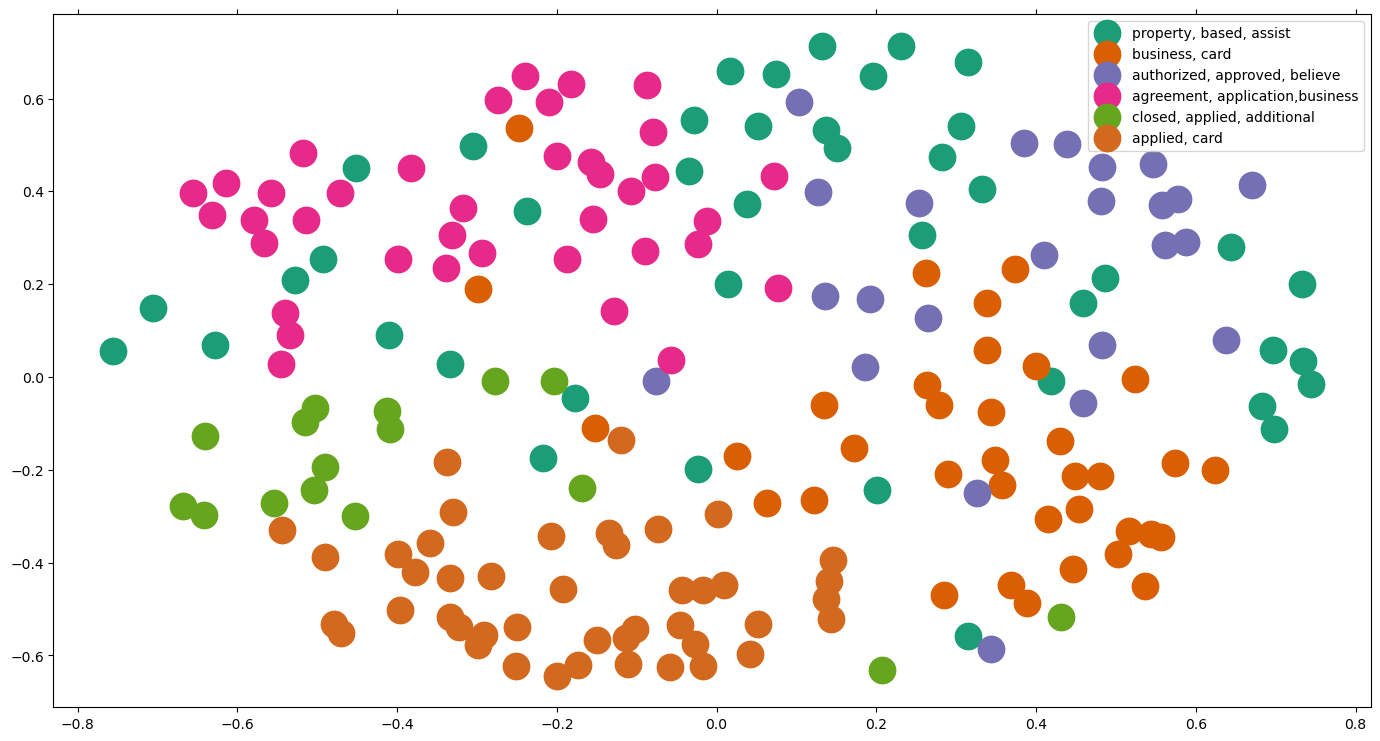

In [26]:
#Create data frame that has the result of the MDS and the cluster
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters))
groups = df.groupby('label')

# Set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=20, 
            label=cluster_names[name], color=cluster_colors[name],
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',
        which='both',
        bottom='off',
        top='off',
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',
        which='both',
        left='off',
        top='off',
        labelleft='off')
ax.legend(numpoints=1)
plt.show()